# Keras Upgrade

In [ ]:
!pip install --upgrade keras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 24.8 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.1.1 which is incompatible.


In [ ]:
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'

# Letter recognition (small size)

> Indeed, I once even proposed that the toughest challenge facing AI workers is to answer the question: “What are the letters ‘A’ and ‘I’? - [Douglas R. Hofstadter](https://web.stanford.edu/group/SHR/4-2/text/hofstadter.html) (1995)


## notMNIST


Data source: [notMNIST](http://yaroslavvb.blogspot.com/2011/09/notmnist-dataset.html) (you need to download `notMNIST_small.mat` file):

![](http://yaroslavvb.com/upload/notMNIST/nmn.png)

> some publicly available fonts and extracted glyphs from them to make a dataset similar to MNIST. There are 10 classes, with letters A-J taken from different fonts.

> Approaching 0.5% error rate on notMNIST_small would be very impressive. If you run your algorithm on this dataset, please let me know your results.


## So, why not MNIST?

Many introductions to image classification with deep learning start with MNIST, a standard dataset of handwritten digits. This is unfortunate. Not only does it not produce a “Wow!” effect or show where deep learning shines, but it also can be solved with shallow machine learning techniques. In this case, plain k-Nearest Neighbors produces more than 97% accuracy (or even 99.5% with some data preprocessing!). Moreover, MNIST is not a typical image dataset – and mastering it is unlikely to teach you transferable skills that would be useful for other classification problems

> Many good ideas will not work well on MNIST (e.g. batch norm). Inversely many bad ideas may work on MNIST and no[t] transfer to real [computer vision]. - [François Chollet’s tweet](https://twitter.com/fchollet/status/852594987527045120)

In [ ]:
!wget http://yaroslavvb.com/upload/notMNIST/notMNIST_small.mat

--2024-04-01 02:15:28--  http://yaroslavvb.com/upload/notMNIST/notMNIST_small.mat
Resolving yaroslavvb.com (yaroslavvb.com)... 129.121.4.193
Connecting to yaroslavvb.com (yaroslavvb.com)|129.121.4.193|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 117586976 (112M)
Saving to: ‘notMNIST_small.mat’

notMNIST_small.mat  100%[===================>] 112.14M  43.8MB/s    in 2.6s    

2024-04-01 02:15:31 (43.8 MB/s) - ‘notMNIST_small.mat’ saved [117586976/117586976]



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from scipy import io

## Data Loading

In [ ]:
data = io.loadmat('notMNIST_small.mat')

data

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Wed Aug 10 11:38:32 2011',
 '__version__': '1.0',
 '__globals__': [],
 'images': array([[[  0.,   0.,   0., ...,   0.,   0.,   0.],
         [  0.,   1.,   0., ...,   0.,   0.,   0.],
         [  0.,   0.,   0., ...,   0.,   0.,   0.],
         ...,
         [255.,   0., 215., ...,   0., 160., 124.],
         [255.,   0., 227., ...,   0., 122.,  72.],
         [255.,   0., 156., ...,   0.,   0.,  12.]],
 
        [[  0.,   0.,   0., ...,   0.,   0.,   0.],
         [  0.,  19.,   0., ...,   0.,   0.,   0.],
         [  0.,  93.,   0., ...,   0.,   0.,   0.],
         ...,
         [255.,   0., 255., ...,   0., 255., 255.],
         [255.,   0., 110., ...,   0., 206., 227.],
         [255.,   0.,  21., ...,   0.,   0.,  63.]],
 
        [[  0.,   3.,   0., ...,   0.,   0.,   0.],
         [  0., 167.,   0., ...,   0.,   0.,   0.],
         [  0., 255.,   0., ...,   1.,   1.,   0.],
         ...,
         [255.,   0., 223.

In [ ]:
x = data['images']
y = data['labels']

In [ ]:
x.shape, y.shape

((28, 28, 18724), (18724,))

In [ ]:
resolution = 28
classes = 10

x = np.transpose(x, (2, 0, 1))
print(x.shape)
x = x.reshape( (-1, resolution, resolution, 1) )

(18724, 28, 28)


In [ ]:
# sample, x, y, channel
x.shape, y.shape

((18724, 28, 28, 1), (18724,))

* 데이터 살펴보기

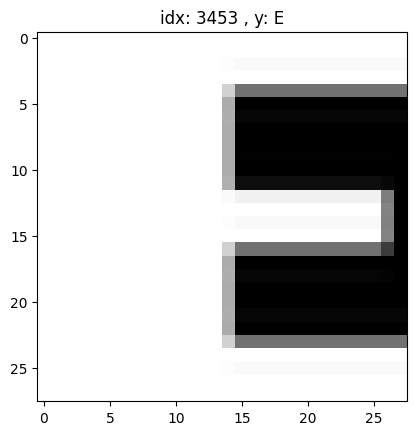

In [ ]:
rand_i = np.random.randint(0, x.shape[0])

plt.title( f'idx: {rand_i} , y: {"ABCDEFGHIJ"[ int(y[rand_i]) ]}' )
plt.imshow( x[rand_i, :, :, 0], cmap='gray' )
plt.show()

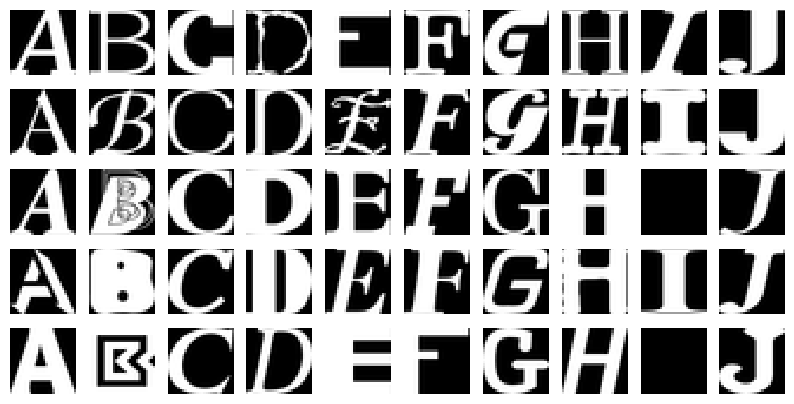

In [ ]:
rows = 5
fig, axes = plt.subplots(rows, classes, figsize=(classes,rows))

for letter_id in range(classes) :
    letters = x[y==letter_id]      # 0부터 9까지 각 숫자에 맞는 array가 letters에 들어간다.
    letters_len = len(letters)

    for row_i in range(rows) :
        axe = axes[row_i, letter_id]
        axe.imshow( letters[np.random.randint(letters_len)], cmap='gray', interpolation='none')
        axe.axis('off')

## Data Preprocessing

* Data split

    - training set : test set = 8 : 2
    - 재현을 위한 난수 고정 : 2023

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.2, random_state=2024)

In [1]:
x_train.shape, y_train.shape, x_val.shape, y_val.shape

NameError: name 'x_train' is not defined

* Scaling

    - min-max scaling

In [ ]:
max_n, min_n = x_train.max(), x_train.min()

In [ ]:
x_train = (x_train - min_n) / (max_n - min_n)
x_val = (x_val - min_n) / (max_n - min_n)

In [ ]:
x_train.max(), x_val.min()

(1.0, 0.0)

* One-hot encoding

In [ ]:
from keras.utils import to_categorical

In [ ]:
class_n = len(np.unique(y_train))

In [ ]:
y_train = to_categorical(y_train, class_n)
y_val = to_categorical(y_val, class_n)

* Data shape 재확인

In [ ]:
x_train.shape, y_train.shape

((14979, 28, 28, 1), (14979, 10))

## Modeling
- 조건
    1. Sequential API, Functional API 중 택일
    2. Flatten Layer 사용할 것
    3. Activation Function이 주어진 Dense Layer 뒤에 BatchNormalization 사용할 것
    4. Dropout을 0.2 정도로 사용할 것
    5. Early Stopping을 사용할 것

In [ ]:
import keras
keras.__version__

'3.1.1'

In [ ]:
# 1. 세선 클리어
# keras.backend.clear_session()
keras.utils.clear_session()

# 2. 모델 발판 선언 : 순차적으로 쌓을 발판
model = keras.models.Sequential()

# 3. 레이어 블록 조립 : .add()
model.add(keras.layers.Input(shape=(28, 28, 1)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(10, activation='softmax'))

# 4. 컴파일
# sparse_categorical_crossentropy: one-hot encoding을 하지 않았을 때 사용
model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 271,370 (1.04 MB)

 Trainable params: 270,346 (1.03 MB)

 Non-trainable params: 1,024 (4.00 KB)

* Early stopping

In [ ]:
from keras.callbacks import EarlyStopping

In [ ]:
es = EarlyStopping(monitor='val_loss', # Early Stopping 관측 지표
                   min_delta=0, # 임계값 Threshold, 지표의 성능 개선 임계값
                   patience=5, # 성능 개선이 발생하지 않을 때, 몇 epochs를 더 진행할 것인가
                   verbose=1,
                   restore_best_weights=True, # 최적의 가중치를 가진 epoch 시점으로 가중치를 되돌림
                   )

* .fit( )

In [ ]:
model.fit(x_train, y_train, validation_split=0.2,
          epochs=10000, verbose=1,
          callbacks=[es]
          )

Epoch 1/10000
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7673 - loss: 0.7903 - val_accuracy: 0.8909 - val_loss: 0.3749
Epoch 2/10000
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8863 - loss: 0.3868 - val_accuracy: 0.8962 - val_loss: 0.3655
Epoch 3/10000
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8967 - loss: 0.3453 - val_accuracy: 0.8972 - val_loss: 0.3569
Epoch 4/10000
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9070 - loss: 0.3184 - val_accuracy: 0.9009 - val_loss: 0.3609
Epoch 5/10000
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9095 - loss: 0.2953 - val_accuracy: 0.9092 - val_loss: 0.3137
Epoch 6/10000
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9171 - loss: 0.2644 - val_accuracy: 0.9012 - val_loss: 0.3290
Epoch 7/10000
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9219 - loss: 0.2530 - val_accuracy: 0.9062 - val_loss: 0.3293
Epoch 8/10000
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9225 - loss: 0

* .evaluate( )

In [ ]:
model.evaluate(x_val, y_val)

118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9177 - loss: 0.2799


[0.28760772943496704, 0.9158878326416016]

* .predict( )

In [ ]:
y_pred = model.predict(x_val)

118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [ ]:
# 원핫 인코딩 한 것을 다시 묶어주는 코드
# 평가 지표 및 실제 데이터 확인을 위해 필요

y_pred_arg = np.argmax(y_pred, axis=1)
test_y_arg = np.argmax(y_val, axis=1)

In [ ]:
y_pred_arg.shape

(3745,)

* 평가 지표

In [ ]:
from sklearn.metrics import classification_report
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']
print(classification_report(test_y_arg, y_pred_arg, target_names=class_names))

              precision    recall  f1-score   support

           A       0.94      0.90      0.92       360
           B       0.92      0.91      0.92       382
           C       0.90      0.96      0.93       385
           D       0.92      0.92      0.92       373
           E       0.87      0.90      0.88       364
           F       0.95      0.94      0.95       392
           G       0.91      0.89      0.90       390
           H       0.92      0.93      0.93       364
           I       0.94      0.85      0.90       360
           J       0.88      0.96      0.92       375

    accuracy                           0.92      3745
   macro avg       0.92      0.92      0.92      3745
weighted avg       0.92      0.92      0.92      3745



## Visualization

* 실제 데이터 확인

idx = 444
해당 인덱스의 이미지는 J
모델의 예측 : J
모델의 클래스별 확률 : 
-------------------
A 0.0
B 0.0
C 0.0
D 0.0
E 0.0
F 0.0
G 0.0
H 0.0
I 0.0
J 99.0
정답


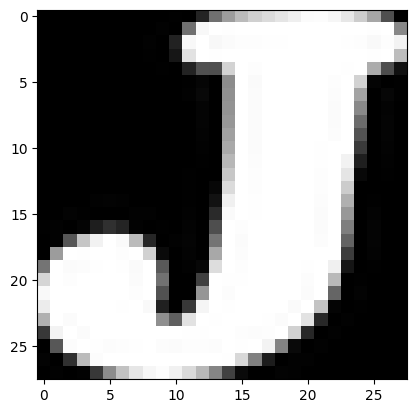

In [ ]:
letters_str = "ABCDEFGHIJ"

rand_idx = np.random.randint(0, len(y_pred_arg))
test_idx = test_y_arg[rand_idx]
pred_idx = y_pred_arg[rand_idx]
class_prob = np.floor( y_pred[rand_idx]*100 )

print(f'idx = {rand_idx}')
print(f'해당 인덱스의 이미지는 {letters_str[test_idx]}')
print(f'모델의 예측 : {letters_str[pred_idx]}')
print(f'모델의 클래스별 확률 : ')
print('-------------------')
for idx, val in enumerate(letters_str) :
    print(val, class_prob[idx])
print('=================================================')

if test_y_arg[rand_idx] == y_pred_arg[rand_idx] :
    print('정답')
else :
    print('땡')

plt.imshow(x_val[rand_idx], cmap='gray')
plt.show()

* 틀린 이미지만 확인해보기

In [ ]:
temp = (test_y_arg == y_pred_arg)
false_idx = np.where(temp==False)[0]
false_len = len(false_idx)
false_len

315

idx = 2137
해당 인덱스의 이미지는 G
모델의 예측 : C
모델의 클래스별 확률 : 
-------------------
A 0.0
B 0.0
C 69.0
D 0.0
E 4.0
F 0.0
G 24.0
H 0.0
I 0.0
J 0.0
땡


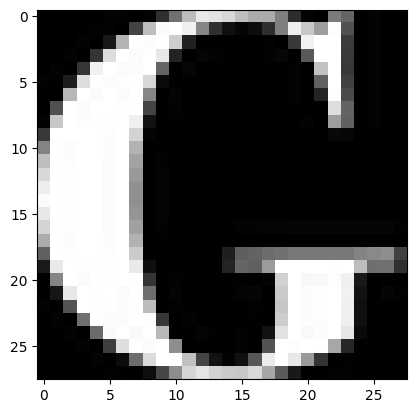

In [ ]:
letters_str = "ABCDEFGHIJ"

rand_idx = false_idx[np.random.randint(0, false_len)]
test_idx = test_y_arg[rand_idx]
pred_idx = y_pred_arg[rand_idx]
class_prob = np.floor( y_pred[rand_idx]*100 )

print(f'idx = {rand_idx}')
print(f'해당 인덱스의 이미지는 {letters_str[test_idx]}')
print(f'모델의 예측 : {letters_str[pred_idx]}')
print(f'모델의 클래스별 확률 : ')
print('-------------------')
for idx, val in enumerate(letters_str) :
    print(val, class_prob[idx])
print('=================================================')

if test_y_arg[rand_idx] == y_pred_arg[rand_idx] :
    print('정답')
else :
    print('땡')

plt.imshow(x_val[rand_idx], cmap='gray')
plt.show()